<a href="https://colab.research.google.com/github/Buck-61/cs290/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("https://github.com/Buck-61/cs290/raw/refs/heads/main/heart.csv")
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [50]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [51]:
y = df["output"]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [52]:
x = df.drop("output", axis=1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [54]:
# method for naive bayes classifier

def fit(self,X, y):
    n_samples, n_features = X.shape
    self._classes = np.unique(y)
    n_classes = len(self._classes)

    self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
    self._var = np.zeros((n_classes, n_features), dtype = np.float64)
    self._priors = np.zeros(n_classes, dtype= np.float64)

    for i in self._classes:
      X_i = X[i==y]
      self._mean[i, :] = X_i.mean(axis=0)
      self._var[i, :] = X_i.var(axis=0)
      self._priors[i] = X_i.shape[0] / float(n_samples)

    def predict(self, X):
      y_pred = [self._predict(x) for x in X]
      return y_pred

    return self._classes




In [55]:
fit(df, x, y)

<ipython-input-54-6a8701b57f28>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._classes = np.unique(y)
<ipython-input-54-6a8701b57f28>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
<ipython-input-54-6a8701b57f28>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._var = np.zeros((n_classes, n_features), dtype = np.float64)
<ipython-input-54-6a8701b57f28>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._priors = np.zeros(n_classes, dt

array([0, 1])

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [58]:
from sklearn.tree import export_graphviz

In [59]:
export_graphviz(
    tree_clf,
    out_file = "heart_tree.dot",
    feature_names = x.columns,
    class_names = [str(x) for x in y],
    rounded = True,
    filled = True

)

In [60]:
from graphviz import Source

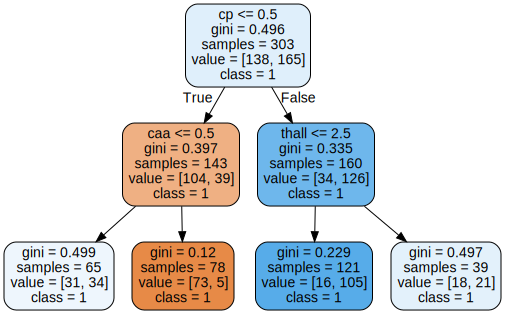

In [62]:
Source.from_file("heart_tree.dot")